# Distributions

In this Jupyter notebook, we plot the behaviour of various distributions and their proberties.

In [4]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.special import binom, factorial
from scipy.stats import beta as beta_distr

In [5]:
# path file structre
fig_path = "figures/distributions/"
Path(fig_path).mkdir(exist_ok=True, parents=True)

## Beta distribution

In [2]:
beta_modes = np.array([.2, .5, .8])
beta_concent1 = 1.
beta_concent2 = 10.
beta_concent3 = 100.
beta_concent4 = 1000.
x = np.linspace(0, 1, 100)

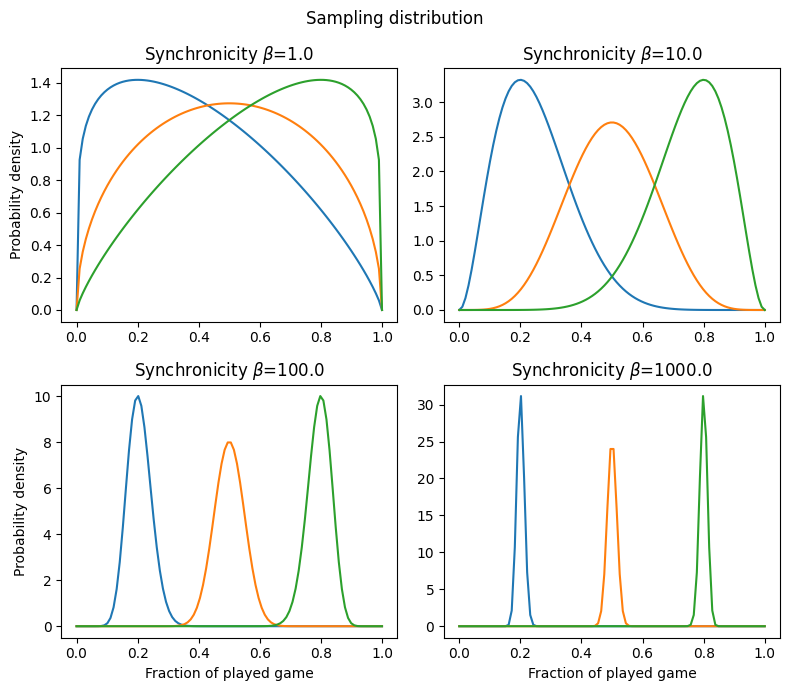

In [13]:
# Plot distributions
fig, ax = plt.subplots(2, 2, figsize=(8, 7))
for i_a, (a, concentration) in enumerate(zip(ax.reshape(-1), [beta_concent1, beta_concent2, beta_concent3, beta_concent4])):
    alpha = 1 + concentration * beta_modes
    beta = 1 + concentration * (1 - beta_modes)
    a.plot(x, beta_distr.pdf(x, alpha[0], beta[0]))
    a.plot(x, beta_distr.pdf(x, alpha[1], beta[1]))
    a.plot(x, beta_distr.pdf(x, alpha[2], beta[2]))
    if i_a > 1:
        a.set_xlabel('Fraction of played game')
    if i_a % 2 == 0:
        a.set_ylabel('Probability density')
    a.set_title(r'Synchronicity $\beta$=%.1f' % concentration)

fig.suptitle('Sampling distribution')
fig.tight_layout()
plt.savefig('%s/beta_sampling.png' % fig_path)

## Erdős–Rényi model

In [10]:
def pathlength(size, length, p):
    return p**(length-1) * binom(size, length)

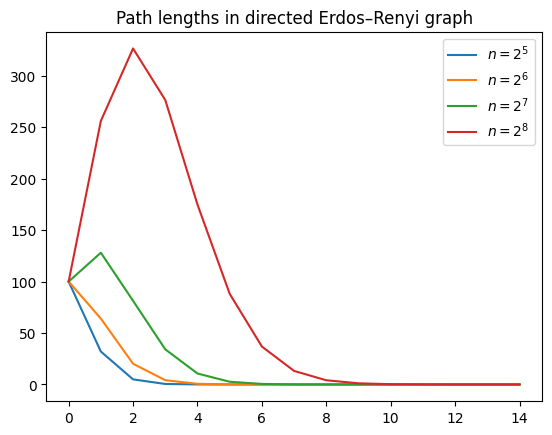

In [11]:
p_connect = .01
l_path = 15
plt.plot([pathlength(2**5, l, p_connect) for l in np.arange(l_path)], label=r'$n=2^5$')
plt.plot([pathlength(2**6, l, p_connect) for l in np.arange(l_path)], label=r'$n=2^6$')
plt.plot([pathlength(2**7, l, p_connect) for l in np.arange(l_path)], label=r'$n=2^7$')
plt.plot([pathlength(2**8, l, p_connect) for l in np.arange(l_path)], label=r'$n=2^8$')
# plt.plot([pathlength(2**9, l, p_connect) for l in np.arange(l_path)], label=r'$n=2^9$')
plt.title('Path lengths in directed Erdos–Renyi graph')
plt.legend()
# plt.yscale('log')
plt.savefig('%s/path_lengths_random_graph.png' % fig_path)

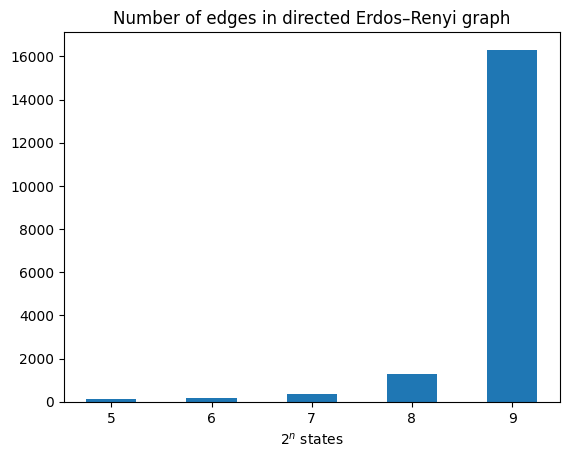

In [12]:
plt.bar(
    np.arange(5., 10., 1),
    [
        sum([pathlength(2**5, l, p_connect) for l in np.arange(l_path)]),
        sum([pathlength(2**6, l, p_connect) for l in np.arange(l_path)]),
        sum([pathlength(2**7, l, p_connect) for l in np.arange(l_path)]),
        sum([pathlength(2**8, l, p_connect) for l in np.arange(l_path)]),
        sum([pathlength(2**9, l, p_connect) for l in np.arange(l_path)]),
    ],
    width=.5
)
plt.title('Number of edges in directed Erdos–Renyi graph')
plt.xlabel(r'$2^n$ states')
plt.savefig('%s/n_edges_random_graph.png' % fig_path)

In [61]:
print('Number of paths smaller than or equal to 10 with 8 positions: %.3f' % 
      sum([pathlength(2**8, l, p_connect) for l in np.arange(10)]))
print('Number of paths smaller than or equal to 10 with 9 positions: %.3f' % 
      sum([pathlength(2**9, l, p_connect) for l in np.arange(10)]))

Number of paths smaller than or equal to 10 with 8 positions: 1276.881
Number of paths smaller than or equal to 10 with 9 positions: 15764.160
